# Prep Factors

In [1]:
from functions.utils.func import *

from prep_factor import PrepFactor

stock = read_stock(get_load_data_large_dir() / 'permno_to_train_fund.csv')
start='2007-01-01'
end = '2023-01-01'

In [3]:
cycle = PrepFactor(factor_name='factor_time', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_time --------------------------------------- | ✔
Shape: (3239809, 5)


In [61]:
ret = PrepFactor(factor_name='factor_ret', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ret ----------------------------------------| ✔
|Shape: (3239809, 11)
--

In [65]:
ohclv = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')

\

In [70]:
ticker = pd.read_parquet(get_load_data_parquet_dir() / 'data_ticker.parquet.brotli')
ticker

|

ticker
permno date             
10078  2005-01-03   SUNW
       2005-01-04   SUNW
       2005-01-05   SUNW
       2005-01-06   SUNW
       2005-01-07   SUNW
...                  ...
93436  2022-12-23   TSLA
       2022-12-27   TSLA
       2022-12-28   TSLA
       2022-12-29   TSLA
       2022-12-30   TSLA

[4047711 rows x 1 columns]

\\

In [85]:
x = get_stock_data(ticker, 93436)
x = set_timeframe(x, '2020-11-05', '2022-11-14')
x

ticker
permno date             
93436  2020-11-05   TSLA
       2020-11-06   TSLA
       2020-11-09   TSLA
       2020-11-10   TSLA
       2020-11-11   TSLA
...                  ...
       2022-11-08   TSLA
       2022-11-09   TSLA
       2022-11-10   TSLA
       2022-11-11   TSLA
       2022-11-14   TSLA

[510 rows x 1 columns]

--

In [78]:
y = get_stock_data(ohclv, 93436)
# y = set_timeframe(y, '2007-11-05', '2007-11-14')

|

In [84]:
y.loc[y.Close>1000]

Open        High        Low       Close      Volume
permno date                                                                 
93436  2020-06-10   991.88000  1027.47998  982.50000  1025.05005  18502866.0
       2020-06-18  1003.00000  1019.20001  994.47083  1003.96002   9734252.0
       2020-06-19  1012.78003  1015.96991  991.34003  1000.90002   8661989.0
       2020-06-23   998.88000  1012.00000  994.01007  1001.78003   6351083.0
       2020-06-29   969.01001  1010.00000  948.52008  1009.34998   9000317.0
...                       ...         ...        ...         ...         ...
       2022-04-13   981.07501  1026.23999  973.09698  1022.37000  18315090.0
       2022-04-18   989.03003  1014.91998  973.40997  1004.28998  17183467.0
       2022-04-19  1005.06000  1034.93994  995.32501  1028.15002  16558682.0
       2022-04-21  1074.72998  1092.21997  996.41498  1008.78003  34985364.0
       2022-04-22  1014.90997  1034.84998  994.00012  1005.04999  23158275.0

[117 rows x 5 columns]

\\

<AxesSubplot:xlabel='permno,date'>

-

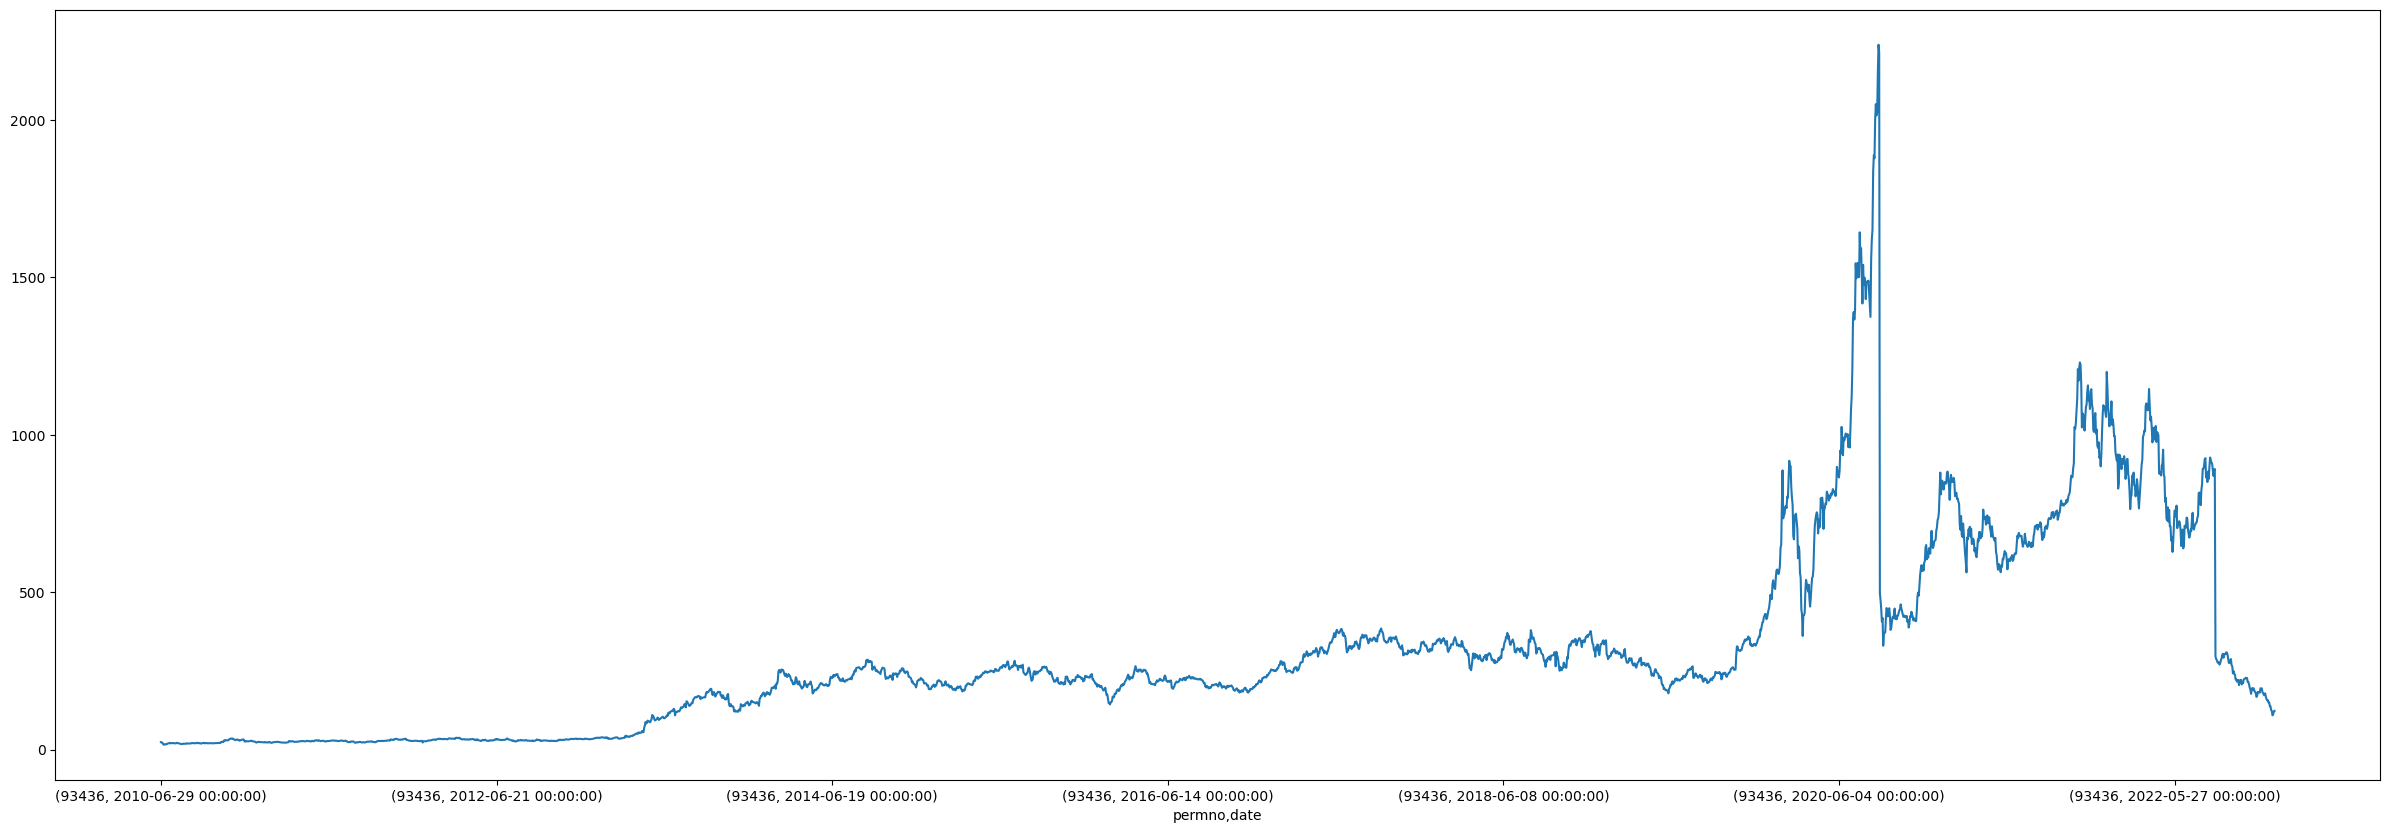

|

In [80]:
y.Close.plot(figsize=(30,10))

In [64]:
ret.loc[ret.RET_01>0.10]

RET_01    RET_02    RET_03    RET_04    RET_05    RET_10  \
permno date                                                                     
10078  2007-11-12  2.990272  2.951830  2.929119  2.974806  2.591944  2.476271   
       2008-09-30  0.125926 -0.005236 -0.045226 -0.028133 -0.020619 -0.097387   
       2008-10-13  0.195833  0.101727  0.014134 -0.028765 -0.130303 -0.149630   
       2008-11-13  0.127072  0.012407 -0.016867 -0.028571 -0.040000 -0.228733   
       2008-12-02  0.148410  0.025237  0.045016  0.062092  0.015625 -0.099723   
...                     ...       ...       ...       ...       ...       ...   
93436  2020-11-18  0.101968  0.192482  0.191285  0.181854  0.166639  0.155969   
       2021-03-09  0.196412  0.126482  0.083902  0.031200 -0.018734 -0.036146   
       2021-10-25  0.126616  0.146376  0.183714  0.185810  0.177851  0.294113   
       2022-01-03  0.135317  0.120934  0.104577  0.102263  0.096751  0.286531   
       2022-01-31  0.106776  0.129803 -0.000736  0.019948  0.007226 -0.107554   

                     RET_20    RET_40    RET_60   RET_120   RET_210  
permno date                                                          
10078  2007-11-12  2.356792  2.604569  3.299790  2.812268  2.384488  
       2008-09-30 -0.155556 -0.174810 -0.295644 -0.503268 -0.631961  
       2008-10-13 -0.346241 -0.471455 -0.394515 -0.627756 -0.698688  
       2008-11-13 -0.227273 -0.496917 -0.593625 -0.687356 -0.737283  
       2008-12-02 -0.329897 -0.507576 -0.630262 -0.715412 -0.811703  
...                     ...       ...       ...       ...       ...  
93436  2020-11-18  0.151429  0.279420 -0.759487 -0.458145 -0.145586  
       2021-03-09 -0.219870 -0.234586  0.114313  0.497643 -0.136480  
       2021-10-25  0.295062  0.439572  0.491356  0.527499  0.586520  
       2022-01-03  0.182084 -0.024498  0.511801  0.836267  1.006489  
       2022-01-31 -0.113609 -0.136345 -0.228313  0.319343  0.415519  

[13501 rows x 11 columns]

\/

In [5]:
volatility = PrepFactor(factor_name='factor_volatility', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_volatility --------------------------------- | ✔
Shape: (3239809, 11)


In [6]:
volume = PrepFactor(factor_name='factor_volume', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

Creating factor_volume ------------------------------------- | ✔
Shape: (3239809, 5)


In [7]:
sb_fama = PrepFactor(factor_name='factor_sb_fama', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_fama ------------------------------------ | ✔
Shape: (3239809, 20)


In [8]:
sb_etf = PrepFactor(factor_name='factor_sb_etf', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

Creating factor_sb_etf -------------------------------------| ✔
Shape: (3239809, 30)


In [12]:
rank_ret = PrepFactor(factor_name='factor_rank_ret', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_ret ----------------------------------- | ✔
Shape: (3239809, 3)


In [13]:
sb_bond = PrepFactor(factor_name='factor_sb_bond', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_bond ------------------------------------ | ✔
Shape: (3239809, 20)


In [14]:
sign = PrepFactor(factor_name='factor_sign', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sign --------------------------------------- | ✔
Shape: (3239809, 3)


In [17]:
talib = PrepFactor(factor_name='factor_talib', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_talib -------------------------------------- | ✔
Shape: (3239809, 13)


In [23]:
high = PrepFactor(factor_name='factor_high', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

Creating factor_high --------------------------------------- | ✔
Shape: (3239809, 5)


In [24]:
low = PrepFactor(factor_name='factor_low', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

Creating factor_low ---------------------------------------- | ✔
Shape: (3239809, 5)


In [25]:
rank_volume = PrepFactor(factor_name='factor_rank_volume', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_volume -------------------------------- | ✔
Shape: (3239809, 1)


In [27]:
total = PrepFactor(factor_name='factor_total', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_total -------------------------------------- | ✔
Shape: (3239809, 1)


In [28]:
rank_volatility = PrepFactor(factor_name='factor_rank_volatility', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_volatility ---------------------------- | ✔
Shape: (3239809, 6)


In [75]:
cond_ret = PrepFactor(factor_name='factor_cond_ret', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_cond_ret ----------------------------------- | ✔
Shape: (3239809, 2)


In [38]:
sb_overall = PrepFactor(factor_name='factor_sb_overall', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_overall --------------------------------- | ✔
Shape: (3239809, 20)


In [39]:
sb_sector = PrepFactor(factor_name='factor_sb_sector', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_sector ---------------------------------- | ✔
Shape: (3239809, 28)


In [40]:
sb_ind = PrepFactor(factor_name='factor_sb_ind', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_ind ------------------------------------- | ✔
Shape: (3239809, 28)


In [41]:
dividend = PrepFactor(factor_name='factor_dividend', group='permno', interval='D', kind='dividend', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_dividend ----------------------------------- | ✔
Shape: (3239809, 1)


In [42]:
sb_lag_bond = PrepFactor(factor_name='factor_sb_lag_bond', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_lag_bond -------------------------------- | ✔
Shape: (3239809, 28)


In [43]:
sb_pca = PrepFactor(factor_name='factor_sb_pca', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_sb_pca ------------------------------------- | ✔
Shape: (3239809, 20)


In [49]:
ind = PrepFactor(factor_name='factor_ind', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ind ---------------------------------------- | ✔
Shape: (3239809, 1)


In [50]:
ind_mom = PrepFactor(factor_name='factor_ind_mom', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ind_mom ------------------------------------ | ✔
Shape: (3239809, 6)


In [52]:
cond_ind_mom = PrepFactor(factor_name='factor_cond_ind_mom', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_cond_ind_mom ------------------------------- | ✔
Shape: (3239809, 1)


In [53]:
ind_vwr = PrepFactor(factor_name='factor_ind_vwr', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ind_vwr ------------------------------------ | ✔
Shape: (3239809, 6)


In [54]:
rank_ind_vwr = PrepFactor(factor_name='factor_rank_ind_vwr', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_ind_vwr ------------------------------- | ✔
Shape: (3239809, 6)


In [55]:
rank_ind_mom = PrepFactor(factor_name='factor_rank_ind_mom', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_ind_mom ------------------------------- | ✔
Shape: (3239809, 6)


In [56]:
ind_fama = PrepFactor(factor_name='factor_ind_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ind_fama ----------------------------------- | ✔
Shape: (3239809, 1)


In [57]:
ind_mom_fama = PrepFactor(factor_name='factor_ind_mom_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ind_mom_fama ------------------------------- | ✔
Shape: (3239809, 6)


In [59]:
cond_ind_mom_fama = PrepFactor(factor_name='factor_cond_ind_mom_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_cond_ind_mom_fama -------------------------- | ✔
Shape: (3239809, 1)


In [60]:
ind_vwr_fama = PrepFactor(factor_name='factor_ind_vwr_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_ind_vwr_fama ------------------------------- | ✔
Shape: (3239809, 6)


In [61]:
rank_ind_vwr_fama = PrepFactor(factor_name='factor_rank_ind_vwr_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_ind_vwr_fama -------------------------- | ✔
Shape: (3239809, 6)


In [62]:
rank_ind_mom_fama = PrepFactor(factor_name='factor_rank_ind_mom_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_ind_mom_fama -------------------------- | ✔
Shape: (3239809, 6)


In [70]:
rf_ret = PrepFactor(factor_name='factor_rf_ret', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

Creating factor_rf_ret ------------------------------------- | ✔
Shape: (3239809, 36)


In [102]:
rank_ind_mom_fama = PrepFactor(factor_name='factor_rank_ind_mom_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=False).prep()

Creating factor_rank_ind_mom_fama -------------------------- | ✔
Shape: (3239809, 6)


In [87]:
load_ret = PrepFactor(factor_name='factor_load_ret', group='permno', interval='D', kind='loading', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_load_ret ----------------------------------- | ✔
Shape: (3194363, 5)


In [88]:
clust_ret = PrepFactor(factor_name='factor_clust_ret', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_ret ---------------------------------- | ✔
Shape: (3191951, 1)


In [89]:
clust_load_ret = PrepFactor(factor_name='factor_clust_load_ret', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_load_ret ----------------------------- | ✔
Shape: (3148911, 5)


In [90]:
clust_volume = PrepFactor(factor_name='factor_clust_volume', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_volume ------------------------------- | ✔
Shape: (3194363, 1)


In [91]:
load_volume = PrepFactor(factor_name='factor_load_volume', group='permno', interval='D', kind='loading', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_load_volume -------------------------------- | ✔
Shape: (3194363, 5)


In [92]:
load_volatility = PrepFactor(factor_name='factor_load_volatility', group='permno', interval='D', kind='loading', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_load_volatility ---------------------------- | ✔
Shape: (2988930, 5)


In [93]:
clust_volatility = PrepFactor(factor_name='factor_clust_volatility', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_volatility --------------------------- | ✔
Shape: (2988930, 1)


In [94]:
clust_load_volume = PrepFactor(factor_name='factor_clust_load_volume', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_load_volume -------------------------- | ✔
Shape: (3148911, 5)


In [95]:
clust_ret30 = PrepFactor(factor_name='factor_clust_ret30', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_ret30 -------------------------------- | ✔
Shape: (3184228, 1)


In [96]:
clust_ret60 = PrepFactor(factor_name='factor_clust_ret60', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_ret60 -------------------------------- | ✔
Shape: (3176186, 1)


In [97]:
clust_ind_mom = PrepFactor(factor_name='factor_clust_ind_mom', group='permno', interval='D', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_ind_mom ------------------------------ | ✔
Shape: (3131767, 1)


In [98]:
clust_ind_mom_fama = PrepFactor(factor_name='factor_clust_ind_mom_fama', group='permno', interval='D', kind='ind', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_ind_mom_fama ------------------------- | ✔
Shape: (3178953, 1)


In [2]:
macro = PrepFactor(factor_name='factor_macro', group='permno', interval='D', kind='macro', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_macro -------------------------------------- | ✔
Shape: (4261654, 10)


In [5]:
clust_fund_raw = PrepFactor(factor_name='factor_clust_fund_raw', group='permno', interval='M', kind='cluster', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_clust_fund_raw -----------------------------\| ✔
Shape: (3239809, 1)


In [6]:
fund_raw = PrepFactor(factor_name='factor_fund_raw', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_fund_raw -----------------------------------| /✔
Shape: (3239809, 27)


In [7]:
fund_q = PrepFactor(factor_name='factor_fund_q', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_fund_q -------------------------------------\|✔
/Shape: (3239809, 1)


In [8]:
rank_fund_raw = PrepFactor(factor_name='factor_rank_fund_raw', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_rank_fund_raw ------------------------------\| ✔
Shape: (3239809, 27)
-

In [9]:
age_mom = PrepFactor(factor_name='factor_age_mom', group='permno', interval='D', kind='age', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_age_mom ------------------------------------/||✔
Shape: (3239809, 1)


In [10]:
net_debt_finance = PrepFactor(factor_name='factor_net_debt_finance', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_net_debt_finance ---------------------------| ✔
|Shape: (3239809, 1)


In [11]:
chtax = PrepFactor(factor_name='factor_chtax', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_chtax --------------------------------------/|\✔
Shape: (3239809, 1)


In [12]:
asset_growth = PrepFactor(factor_name='factor_asset_growth', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_asset_growth -------------------------------| ✔
/Shape: (3239809, 1)


In [13]:
mom_season_short = PrepFactor(factor_name='factor_mom_season_short', group='permno', interval='D', kind='mom', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_mom_season_short ---------------------------||-✔
Shape: (3239809, 1)


In [14]:
mom_season = PrepFactor(factor_name='factor_mom_season', group='permno', interval='D', kind='mom', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_mom_season ---------------------------------| ✔
|Shape: (3239809, 1)


In [15]:
noa = PrepFactor(factor_name='factor_noa', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_noa ----------------------------------------| ✔
\Shape: (3239809, 1)


In [16]:
invest_ppe = PrepFactor(factor_name='factor_invest_ppe_inv', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_invest_ppe_inv -----------------------------||✔
/Shape: (3239809, 1)


In [17]:
inv_growth = PrepFactor(factor_name='factor_inv_growth', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_inv_growth ---------------------------------||-✔
Shape: (3239809, 1)


In [18]:
earning_streak = PrepFactor(factor_name='factor_earning_streak', group='permno', interval='M', kind='fundamental', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_earning_streak -----------------------------| ✔
|Shape: (3239809, 1)
|

In [52]:
trend_factor = PrepFactor(factor_name='factor_trend_factor', group='permno', interval='D', kind='trend', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_trend_factor -------------------------------/| ✔
Shape: (3239809, 1)
-/

In [44]:
sb_spy_inv = PrepFactor(factor_name='factor_sb_spy_inv', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=False).prep()

Creating factor_sb_spy_inv --------------------------------- | ✔
Shape: (1797847, 2)


In [ ]:
ep_bond = PrepFactor(factor_name='factor_ep_bond', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

In [ ]:
ep_etf = PrepFactor(factor_name='factor_ep_etf', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

In [ ]:
ep_fama = PrepFactor(factor_name='factor_ep_fama', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

In [19]:
open_asset = PrepFactor(factor_name='factor_open_asset', group='permno', interval='M', kind='open', stock=stock, div=False, start=start, end=end, save=False).prep()

Creating factor_open_asset ---------------------------------| ✔
Shape: (2128549, 11)


In [10]:
open_div = PrepFactor(factor_name='factor_open_div', group='permno', interval='M', kind='open', stock=stock, div=False, start=start, end=end, save=True).prep()

Creating factor_open_div ----------------------------------- | ✔
Shape: (2128549, 1)


In [ ]:
rf_ret = PrepFactor(factor_name='factor_rf_ret', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=True).prep()

In [ ]:
fund_ratio = PrepFactor(factor_name='factor_fund_ratio', group='permno', interval='M', kind='fundamental', tickers='all', div=False, start=start, end=end, save=True).prep()

In [ ]:
sb_macro = PrepFactor(factor_name='factor_sb_macro', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

In [ ]:
rf_volume = PrepFactor(factor_name='factor_rf_volume', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

In [ ]:
rf_sign = PrepFactor(factor_name='factor_rf_sign', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

In [ ]:
sb_oil = PrepFactor(factor_name='factor_sb_oil', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

In [ ]:
sb_fund_ind = PrepFactor(factor_name='factor_sb_fund_ind', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=True).prep()

In [ ]:
sb_fund_raw = PrepFactor(factor_name='factor_sb_fund_raw', group='permno', interval='D', kind='price', stock=stock, div=False, start=start, end=end, save=False).prep()

In [ ]:
mf_ret = PrepFactor(factor_name='factor_mf_ret', group='permno', interval='D', kind='price', div=False, stock=stock, start=start, end=end, save=False).prep()

||--\\|